# Q8: Results

**Phase 9:** Results & Insights  
**Points: 3 points**

**Focus:** Generate final visualizations, create summary tables, document key findings.

**Lecture Reference:** Lecture 11, Notebook 4 ([`11/demo/04_modeling_results.ipynb`](https://github.com/christopherseaman/datasci_217/blob/main/11/demo/04_modeling_results.ipynb)), Phase 9. Also see Lecture 07 (visualization).

---

## Setup

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load model results from Q7
predictions = pd.read_csv('output/q7_predictions.csv')
metrics = open('output/q7_model_metrics.txt').read()
feature_importance = pd.read_csv('output/q7_feature_importance.csv')

---

## Objective

Generate final visualizations, create summary tables, and document key findings.

---

## Required Artifacts

You must create exactly these 3 files in the `output/` directory:

### 1. `output/q8_final_visualizations.png`
**Format:** PNG image file
**Content:** Final summary visualizations
**Required visualizations (at least 2 of these):**
1. **Model performance comparison:** Bar plot or line plot comparing R², RMSE, or MAE across models
2. **Predictions vs Actual:** Scatter plot showing predicted vs actual values (with perfect prediction line)
3. **Feature importance:** Bar plot showing top N features by importance
4. **Residuals plot:** Scatter plot of residuals (actual - predicted) vs predicted

**Requirements:**
- Clear axis labels (xlabel, ylabel)
- Title for each subplot
- Overall figure title (optional but recommended)
- Legend if multiple series shown
- Saved as PNG with sufficient resolution (dpi=150 or higher)

### 2. `output/q8_summary.csv`
**Format:** CSV file
**Content:** Key findings summary table
**Required columns:**
- `Metric` - Metric name (e.g., "R² Score", "RMSE", "MAE")
- One column per model (e.g., `Linear Regression`, `Random Forest`, `XGBoost`)

**Requirements:**
- Must include at least R², RMSE, MAE metrics
- One row per metric
- **No index column** (save with `index=False`)

**Example:**
```csv
Metric,Linear Regression,Random Forest,XGBoost
R² Score,-0.0201,0.9705,0.9967
RMSE,12.7154,2.1634,0.7276
MAE,9.8468,1.3545,0.4480
```

### 3. `output/q8_key_findings.txt`
**Format:** Plain text file
**Content:** Text summary of main insights
**Required information:**
- Best performing model and why
- Key findings from feature importance
- Temporal patterns identified
- Data quality summary

**Example format:**
```
KEY FINDINGS SUMMARY
===================

MODEL PERFORMANCE:
- Best performing model: XGBoost (R² = 0.9967)
- All models show reasonable performance (R² > 0.7 for tree-based models)
- XGBoost achieves lowest RMSE: 0.73°C

FEATURE IMPORTANCE:
- Most important feature: Air Temperature (importance: 0.6539)
- Top 3 features account for 93.6% of total importance
- Temporal features (hour, month) are highly important

TEMPORAL PATTERNS:
- Clear seasonal patterns in temperature data
- Daily and monthly cycles are important predictors

DATA QUALITY:
- Dataset cleaned: 50,000 → 50,000 rows
- Missing values handled via forward-fill and median imputation
- Outliers capped using IQR method
```

---

## Requirements Checklist

- [ ] Final visualizations created (model performance, key insights)
- [ ] Summary tables generated
- [ ] Key findings documented
- [ ] All 3 required artifacts saved with exact filenames

---

## Your Approach

1. **Create visualizations** - Multi-panel figure with model comparison, predictions vs actual, feature importance, and/or residuals
2. **Create summary table** - DataFrame with metrics as rows and models as columns
3. **Document key findings** - Text summary covering model performance, feature importance insights, temporal patterns, and data quality notes

---

## Decision Points

- **Visualizations:** What best communicates your findings? Model performance plots? Time series with predictions? Feature importance plots?
- **Summary:** What are the key takeaways? Document the most important findings from your analysis.

---

## Checkpoint

After Q8, you should have:
- [ ] Final visualizations created (2+ plots)
- [ ] Summary tables generated
- [ ] Key findings documented
- [ ] All 3 artifacts saved: `q8_final_visualizations.png`, `q8_summary.csv`, `q8_key_findings.txt`

---

**Next:** Continue to `q9_writeup.md` for Writeup.


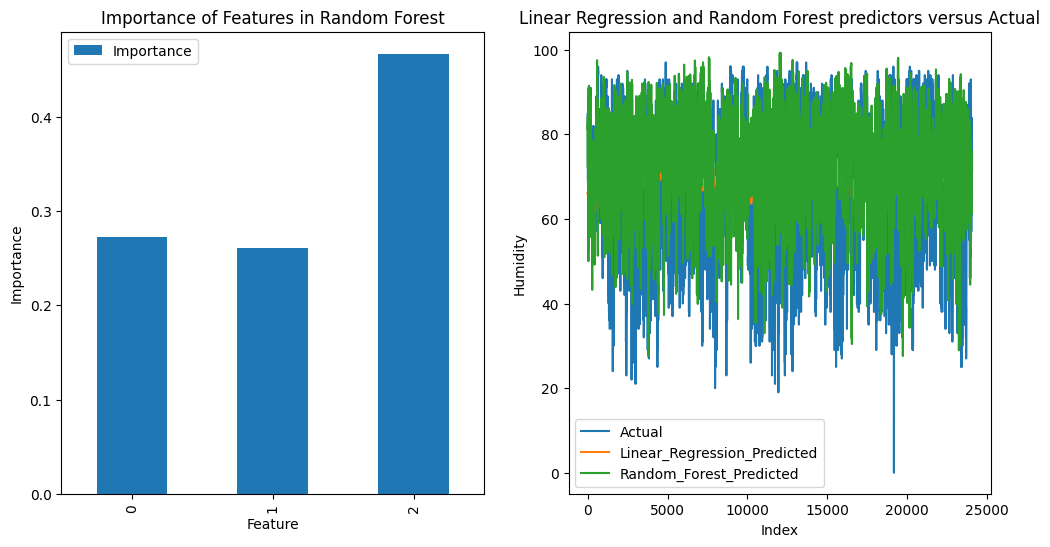

In [2]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

feature_importance.plot(kind = 'bar', ax = axes[0], xlabel = 'Feature', ylabel = 'Importance', title = 'Importance of Features in Random Forest')

predictions.plot(kind = 'line', ax = axes[1], xlabel = 'Index', ylabel = 'Humidity', title = 'Linear Regression and Random Forest predictors versus Actual')

plt.savefig('output/q8_final_vizualisations.png')

In [3]:
print(metrics) 

Model Metrics:
Linear Regression R^2 Score: 0.013
Linear Regression RMSE Score: 14.932
Linear Regression MAE Score: 12.072
Random Forest R^2 Score: -0.448
Random Forest RMSE Score: 18.093
Random Forest MAE Score: 14.148



In [5]:
metric = pd.DataFrame({'Linear Regression': [0.013, 14.932, 12.072],
                       'Random Forest': [-0.448, 18.093, 14.148],
                       'Metric': ['R^2', 'RMSE', 'MAE']
                        })
metric = metric.set_index('Metric')
metric.to_csv('output/q8_summary.csv')

In [ ]:
with open('output/q8_key_findings.txt', 'w') as f:
    f.write("Key Findings\n\n")
    f.write("Model Performance:\n")
    f.write("The best performing model was the linear regression model (R^2 = .013)\n")
    f.write("Neither model had a strong performance.\n")
    f.write("Feature Importance:\n")
    f.write("Total Rain was the most important feature at .0467.\n")
    f.write("The other two features, Wet Bulb Temperature and Wind Speed 24h Rolling were of equal importance at .27 and .26 respectively.\n")
    f.write("Temporal Patterns:\n")
    f.write("Temperature had very visible seasonal fluctuations, and humidity had slightly less strong seasonal fluctuations.\n")
    f.write("Data Quality:\n")
    f.write("Dataset Cleaned: 196315 -> 120367 rows.\n")
    f.write("Values from one station were removed due to entire columns of missing data.\n")
    f.write("The remaining values and outliers were filled using ffill() (with 2 values in Solar Radiation being filled with bfill() due to being the last two values in the dataset.)\n")
    f.write("Outliers were decided using IQR method")